# Learning goals
After this week's lesson you should be able to:
- Perform overlay operations such as union and intersect
- Check for containment or intersection between multiple geometries
- Find centroids and convex hulls 
- Find distances to points

This week's lessons are adapted from:
- [Automating GIS Processes Lesson 1](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-1/overview.html)
- [The Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html)
- [Spatial Data Programming with Python](https://geobgu.xyz/)

In [13]:
import pandas as pd
import geopandas as gpd


# 1. Geometric Objects
There are three kinds of geometric objects: 
- **points**
- **lines**: Connecting points together creates a line
- **polygons**: Connecting lines in an enclosed area creates a polygon. 

These are all the different categories of possible geometric objects. 
<figure class="image">
<img src="https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures by M. W. Toews; cf. Wikipedia’s article on GeoJSON)</figcaption>
</figure>

Let's look at some geometry objects.

## 1.1 Points
Points are represented by a single coordinate are defined using the `Point` class.


In [14]:
stations = gpd.read_file('Subway Stations.zip')

<Axes: >

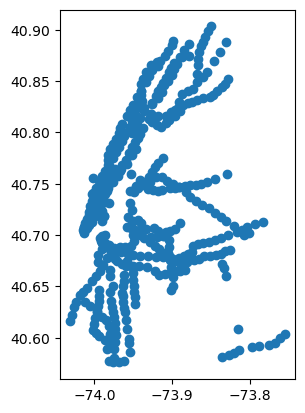

In [15]:
stations.plot()

In [16]:
stations.geom_type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
468    Point
469    Point
470    Point
471    Point
472    Point
Length: 473, dtype: object

## 1.2 LineStrings
The `LineString` class is used to construct lines through a sequence of points. 

In [17]:
lines = gpd.read_file('Subway Lines.zip')


<Axes: >

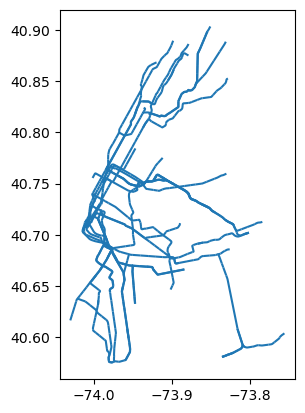

In [18]:
lines.plot()

In [19]:
lines.geom_type

0      LineString
1      LineString
2      LineString
3      LineString
4      LineString
          ...    
737    LineString
738    LineString
739    LineString
740    LineString
741    LineString
Length: 742, dtype: object

## 1.3 Polygons
From the above, we can see that a polygon is just one or more LinearRings (you can have a polygon with a hole in the middle, which would require two LinearRings). 

In [21]:
neighborhoods = gpd.read_file('2010 Neighborhood Tabulation Areas (NTAs).zip')


<Axes: >

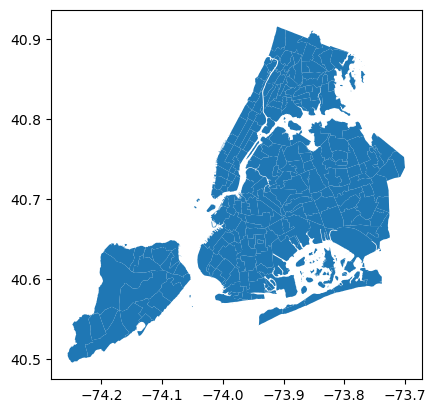

In [22]:
neighborhoods.plot()

In [ ]:
neighborhoods.geom_type

0           Polygon
1           Polygon
2           Polygon
3           Polygon
4           Polygon
           ...     
190         Polygon
191         Polygon
192    MultiPolygon
193         Polygon
194    MultiPolygon
Length: 195, dtype: object

A MultiPolygon is a collection of Polygons. 

In [ ]:
parks = gpd.read_file('Parks Properties_20240130.zip')

<Axes: >

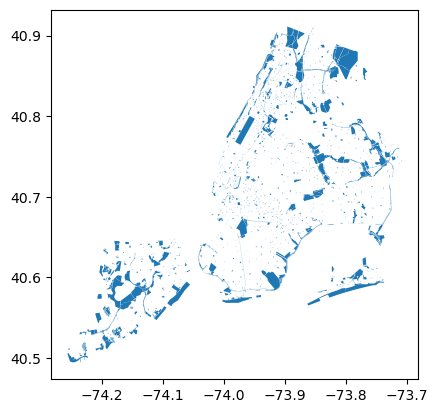

In [ ]:
parks.plot()

# 2. Spatial Operations

`.boundary` returns the "border" of a geometry. If the geometry is a polygon, this method will return the border (a line), if the geometry is a line, this method will return a collection of points. If the geometry is a point, this method will return an empty result. 

<AxesSubplot: >

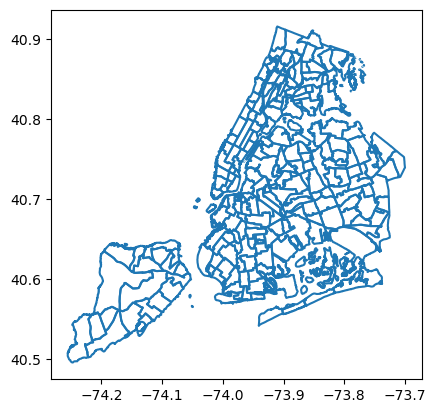

In [ ]:
neighborhoods.boundary.plot()

`.centroid` returns the center point of an object. 

<figure class="image">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Triangle.Centroid.svg/440px-Triangle.Centroid.svg.png" alt="drawing" width="300" style="display: block; margin: 0 auto"/>
 <figcaption><center>(From Wikipedia)</figcaption>
</figure>


/var/folders/cy/x4wtz_6d12s786ynvlhf_sf00000gq/T/ipykernel_40506/1059327912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhoods.centroid.plot()


<AxesSubplot: >

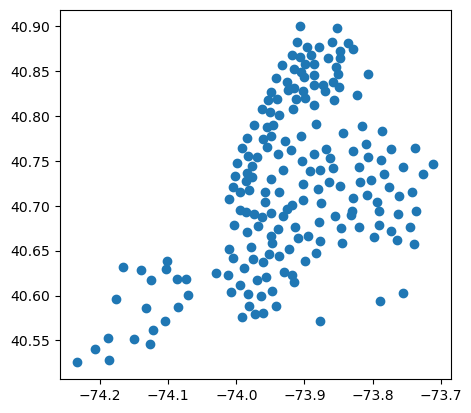

In [ ]:
neighborhoods.centroid.plot()

`.buffer` returns the buffer of a geometry given a radius. 

/var/folders/cy/x4wtz_6d12s786ynvlhf_sf00000gq/T/ipykernel_40506/3795609091.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhoods.buffer(0.01).boundary.plot()


<AxesSubplot: >

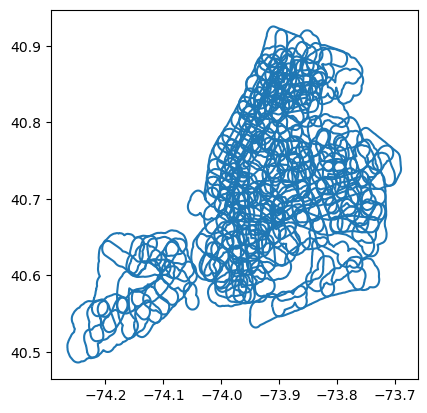

In [ ]:
## I'm plotting the boundaries of the neighborhoods so you can see the buffer more easily. 
neighborhoods.buffer(0.01).boundary.plot()

`.dissolve` combines geometries that are touching. 

<AxesSubplot: >

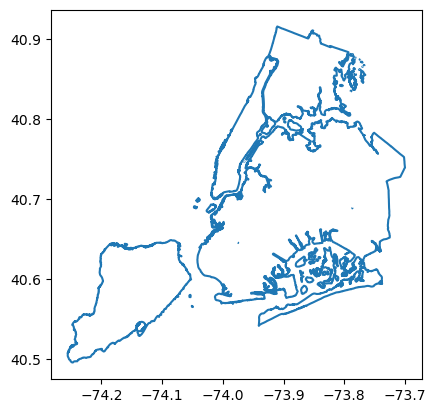

In [ ]:
# Again, plotting teh boundaries so you can see the dissolve more easily.
neighborhoods.dissolve().boundary.plot()

You can also dissolve by a particular category

<AxesSubplot: >

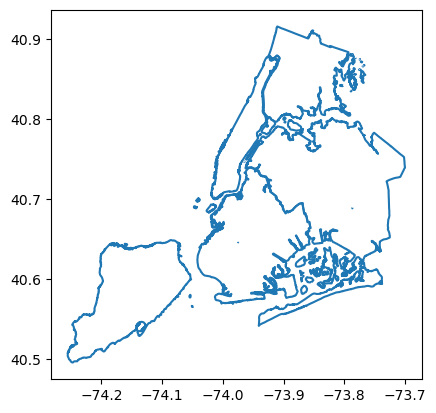

In [ ]:
neighborhoods.dissolve(by='boroname').boundary.plot()

`.convexhull` The convex hull of a geometry is the smallest convex Polygon containing all the points in each geometry, unless the number of points in the geometric object is less than three.

<AxesSubplot: >

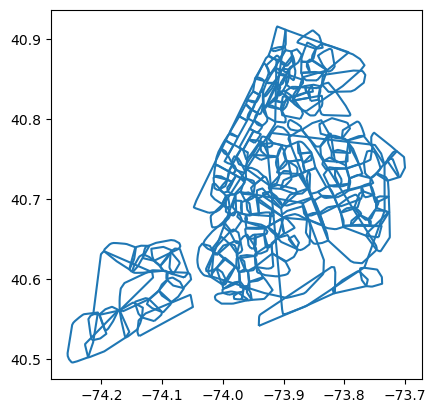

In [ ]:
neighborhoods.convex_hull.boundary.plot()
# a convex hull is useful for finding the 

`.distance` Finds the distance between a point a the geometries in a geodataframe.

In [ ]:
a_point_xy = pd.DataFrame({'longitude': [-73.971321], 'latitude':[40.776676] })
a_point = gpd.GeoDataFrame(a_point_xy, geometry=gpd.points_from_xy(a_point_xy.longitude, a_point_xy.latitude), crs='EPSG:4326')


stations.to_crs(3857).distance(a_point.to_crs(3857).iloc[0].geometry)

0       7195.247996
1       9090.894644
2       2602.385545
3      14080.720392
4      18515.676984
           ...     
468    29288.586793
469     4642.210546
470     1849.488156
471     2183.267293
472     2919.882213
Length: 473, dtype: float64

# 3. Spatial Overlay operations
These types of operations allow us to create new geometries from two geodataframes based on certain ways of overlaying these two. 
![](https://geopandas.org/en/stable/_images/overlay_operations.png)

<Axes: >

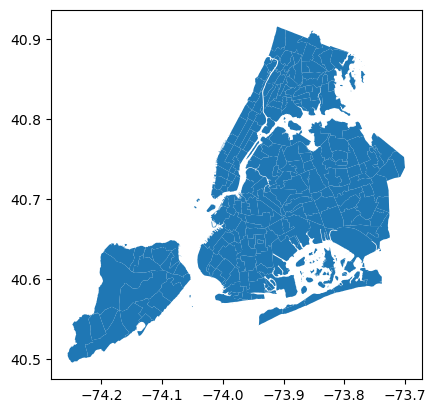

In [23]:
neighborhoods.plot()

<Axes: >

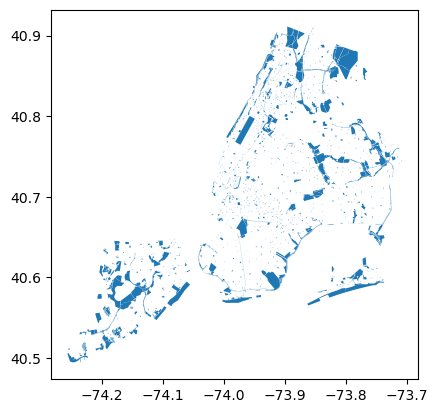

In [24]:
parks.plot()

<Axes: >

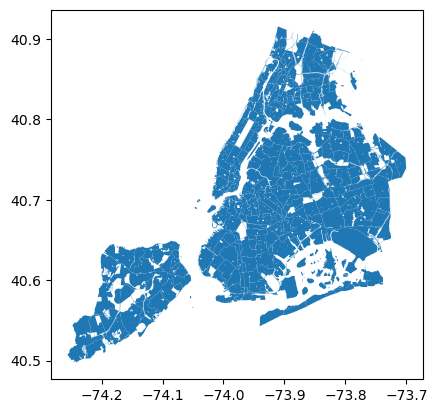

In [25]:
neighborhoods.overlay(parks,how='difference').plot()

In [51]:
neighborhoods.overlay(parks,how='difference')

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:2469: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.overlay(


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316915,"POLYGON ((-73.74962 40.69983, -73.74931 40.699..."
1,4.0,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"MULTIPOLYGON (((-73.80168 40.67438, -73.80159 ..."
2,3.0,Brooklyn,047,BK50,Canarsie,8.208968e+07,43703.609937,"MULTIPOLYGON (((-73.88664 40.64438, -73.88663 ..."
3,2.0,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.90502 40.84240, -73.90515 40.842..."
4,4.0,Queens,081,QN26,North Corona,1.800389e+07,18429.540081,"POLYGON ((-73.85335 40.75601, -73.85319 40.755..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX27,Hunts Point,4.969323e+07,43702.033622,"MULTIPOLYGON (((-73.87210 40.81374, -73.87204 ..."
191,2.0,Bronx,005,BX37,Van Nest-Morris Park-Westchester Square,3.632043e+07,42634.691499,"MULTIPOLYGON (((-73.83440 40.85411, -73.83453 ..."
192,2.0,Bronx,005,BX99,park-cemetery-etc-Bronx,2.214203e+08,224683.284178,"MULTIPOLYGON (((-73.86162 40.81143, -73.86111 ..."
193,3.0,Brooklyn,047,BK83,Cypress Hills-City Line,2.760954e+07,35564.058185,"MULTIPOLYGON (((-73.86132 40.67502, -73.86114 ..."


In [52]:
neighborhoods

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316915,"POLYGON ((-73.75205 40.70523, -73.75174 40.704..."
1,4.0,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68293, -73.80552 40.682..."
2,3.0,Brooklyn,047,BK50,Canarsie,8.208968e+07,43703.609937,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
3,2.0,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85457, -73.89662 40.852..."
4,4.0,Queens,081,QN26,North Corona,1.800389e+07,18429.540081,"POLYGON ((-73.85450 40.75828, -73.85421 40.757..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX27,Hunts Point,4.969323e+07,43702.033622,"POLYGON ((-73.88439 40.82295, -73.88436 40.822..."
191,2.0,Bronx,005,BX37,Van Nest-Morris Park-Westchester Square,3.632043e+07,42634.691499,"POLYGON ((-73.83129 40.85543, -73.83157 40.855..."
192,2.0,Bronx,005,BX99,park-cemetery-etc-Bronx,2.214203e+08,224683.284178,"MULTIPOLYGON (((-73.86956 40.81616, -73.86954 ..."
193,3.0,Brooklyn,047,BK83,Cypress Hills-City Line,2.760954e+07,35564.058185,"POLYGON ((-73.86335 40.67935, -73.86331 40.679..."


# 3. Exercises - Areas not accessible by subway
Here, we are going to look at neighborhoods that are not accesible to a subway station

In [26]:
stations = gpd.read_file('Subway Stations.zip')

Let's look at the first 5 rows

In [28]:
stations.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)


In [29]:
stations.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

Create a 800 meter buffer around each station. If it didn't work, remember that buffers use the unit of measurement for the current CRS your geodataframe is in!

In [37]:
#we want to buffer to be in meters, so I firstconvert this to epsg=3857
stations = stations.to_crs(epsg=3857)
buffer_geom = stations['geometry'].buffer(800)


buffer_crs = stations.crs
buffer_data = stations.drop(columns="geometry")  

## We have to convert the buffer to a GeoDataFrame for the next step. 
## We also have to convert the buffer to the same crs as the neighborhoods.
stations_buffer = gpd.GeoDataFrame(buffer_data, 
                                         crs=buffer_crs, 
                                         geometry=buffer_geom).to_crs(4326)

In [48]:
stations_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot the results

<Axes: >

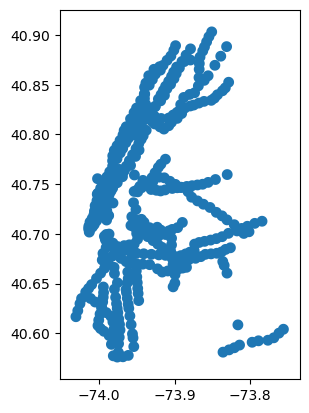

In [45]:
stations_buffer.plot()

Now plot a spatial overlay so you can get the areas in each neighborhood not covered by a station buffer. 

<Axes: >

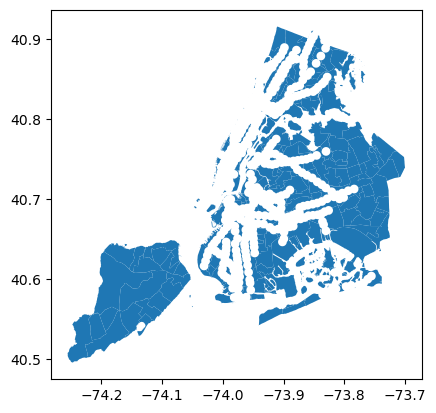

In [50]:
# Insert your code here
neighborhoods = neighborhoods.to_crs(epsg=4326)

#assert that they have the same crs
assert neighborhoods.crs == stations_buffer.crs

neighborhoods.overlay(stations_buffer,how='difference').plot()